# $\text{ARIMA}(p,d,q)$

ARIMA stands for Auto Regressive Integrated Moving Average. The intent of $\text{ARIMA}(p,d,q)$ is to construct a stationary, $\text{ARMA}(p,q)$</br>
time series from a non-stationary time series by differencing $d$ times. Recall that an $\text{ARMA}(p,q)$ process is defined by,

$
\begin{align}
X_t = \varepsilon_t + \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \vartheta_i \varepsilon_{t-i}
\end{align}
$

In terms of the lag operator $L X_t = X_{t-1}, L^2 X_t = X_{t-2}, L^3 X_t = X_{t-3}, \ldots$, The $\text{ARMA}(p,q)$ model can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The difference operator is given by $\Delta = (1 - L)$. If $X_t$ is stationary after $d$ differences it follows that $\left( 1 - L \right)^d X_t$ is stationary. This is the definition of integration order.</br> 
Thus, $\text{ARIMA}(p,d,q)$ can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) \left( 1 - L \right)^d X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The procedure followed to determine the order and coefficients of an $\text{ARIMA}(p,d,q)$ series is as follows.

1. Use ADF test to determine if series is stationary. To determine $d$ difference series until ADF test fails.
2. User PACF/ACF analysis to determine $p$ and $q$.
3. Perform regression on differenced series to determine coefficients.

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (Stats, ARIMA, Source, Est, Test, PlotType)
from lib import (stack, comparison)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## $\text{ARIMA}(1,1,0)$ Example

In [2]:
nsample = 1000
σ = 1.0
nlags = 10

In [3]:
φ = [0.5]
d = 1
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Stats.Func.DIFF.apply(arima, ndiff=1)

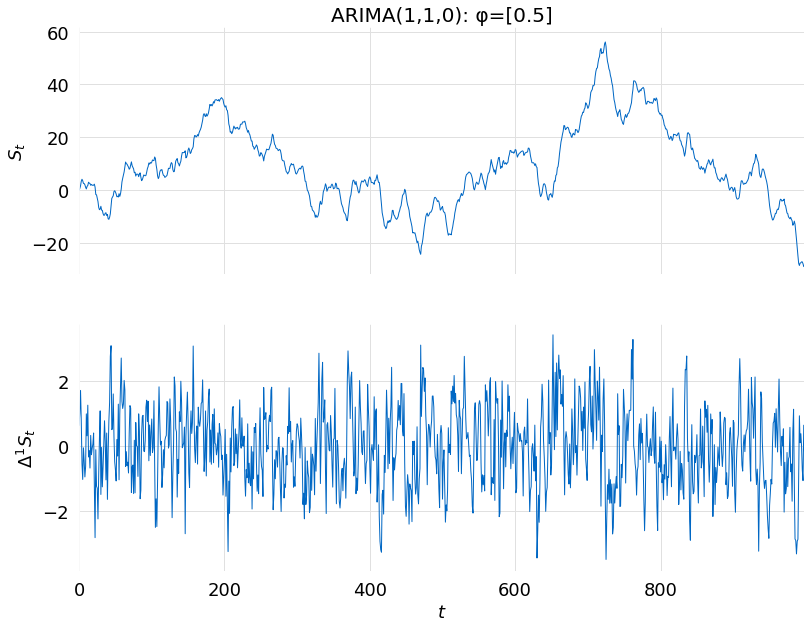

In [4]:
title=f"ARIMA(1,1,0): φ={φ}"
stack([arima, diff_1], title=title)

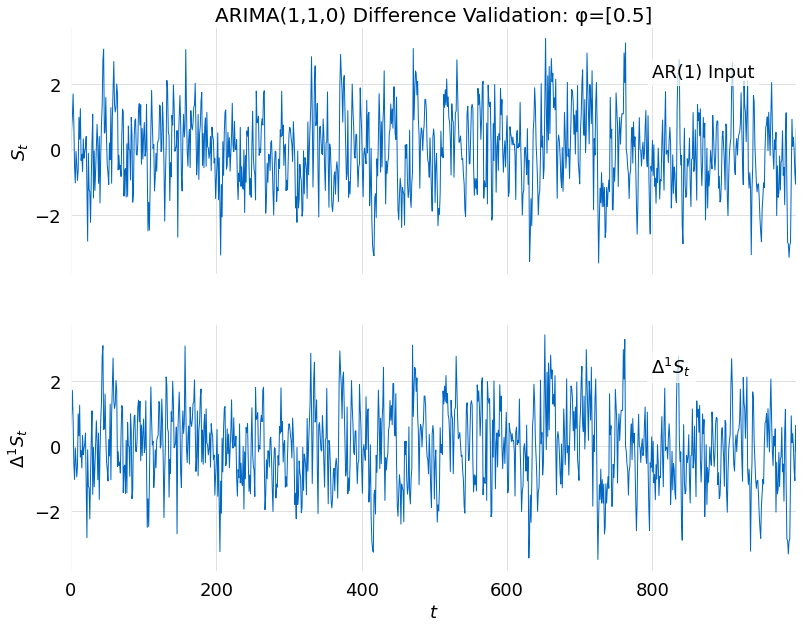

In [5]:
title = f"ARIMA(1,1,0) Difference Validation: φ={φ}"
stack([ar, diff_1], title=title, labels=[r"AR(1) Input", r"$\Delta^1 S_t$"])

In [6]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤═════════════╕
│ Test Statistic │  -1.6369    │
├────────────────┼─────────────┤
│ pvalue         │   0.0959996 │
├────────────────┼─────────────┤
│ Lags           │   1         │
├────────────────┼─────────────┤
│ Number Obs     │ 998         │
╘════════════════╧═════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56798 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [7]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 16:41:51',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 1, q)-Simulation-90ea7981-1c58-4c1c-ba63-2f46f9f1bc30',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 1},
  'Description': 'ARIMA(1) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,
    'TestHypothesis': <TestHypothesis.LOWER_TAIL: 'LOWER_TAIL'>,
    'TestType': <Test.STATIONARITY: 'STATIONARITY'>,
    'ImplType': <_TestImpl.ADF: 'ADF'>,
    'Description': 'Stationarity Test',
    'Distribution': None,
    'Distribution Params': {},
    'TestData': [{'Status': True,
      'Statistic': {'Value': -1.6369035857522136, 'Label': '$t$'},
      'PValue': {'Value': 0.095999

In [8]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤══════════════╕
│ Test Statistic │ -17.1372     │
├────────────────┼──────────────┤
│ pvalue         │   1.3027e-28 │
├────────────────┼──────────────┤
│ Lags           │   0          │
├────────────────┼──────────────┤
│ Number Obs     │ 998          │
╘════════════════╧══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56798 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [9]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 1, q)-Simulation-90ea7981-1c58-4c1c-ba63-2f46f9f1bc30',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 16:41:51',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'DIFF-7cedc117-3b08-4fda-b510-19ad01589299',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 1},
  'Description': 'ARIMA(1) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,
    'T

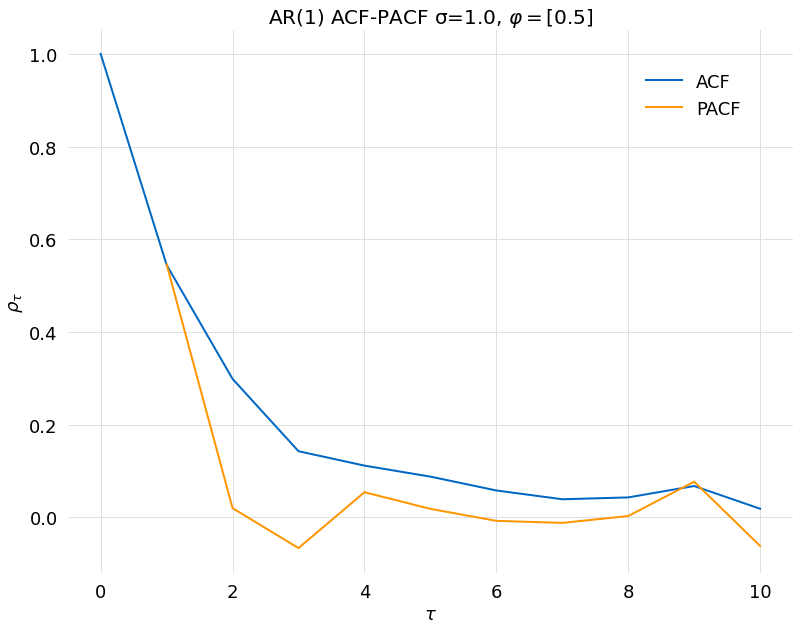

In [10]:
acf = Stats.Func.ACF.apply(diff_1, nlags=nlags)
pacf = ARIMA.Func.PACF.apply(diff_1, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [11]:
result = Est.AR.perform(diff_1, order=1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  999
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1423.517
Date:                Sat, 18 Jun 2022   AIC                           2853.034
Time:                        16:41:52   BIC                           2867.755
Sample:                             0   HQIC                          2858.629
                                - 999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0279      0.070     -0.400      0.689      -0.165       0.109
ar.L1          0.5444      0.027     20.410      0.000       0.492       0.597
sigma2         1.0117      0.046     21.764      0.000       0.921       1.103
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.97   Prob(JB):                         0.72
Heteroskedasticity (H):               1.10   Skew:                             0.04
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(1,2,0)$ Example

In [12]:
φ = [0.75]
d = 2
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Stats.Func.DIFF.apply(arima, ndiff=1)
diff_2 = Stats.Func.DIFF.apply(arima, ndiff=2)

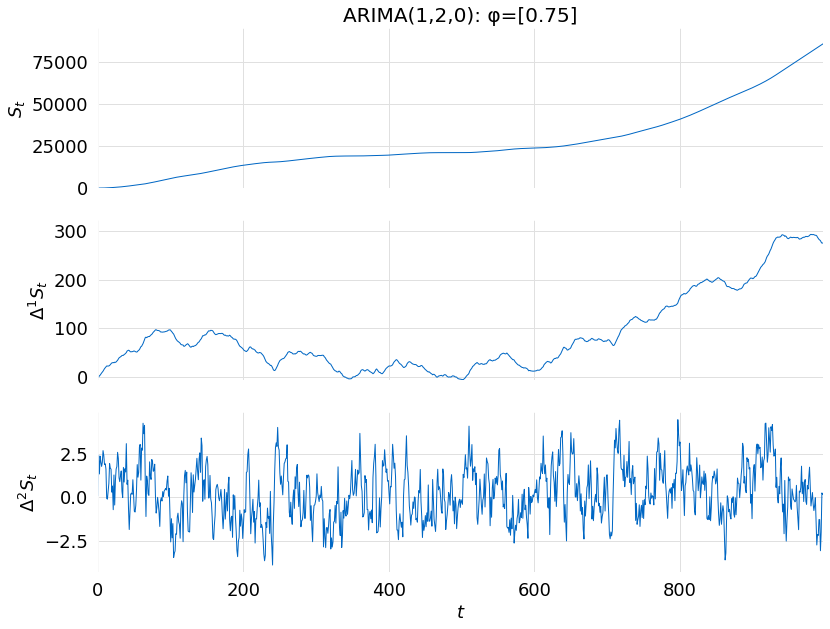

In [13]:
title = f"ARIMA(1,2,0): φ={φ}"
stack([arima, diff_1, diff_2], title=title)

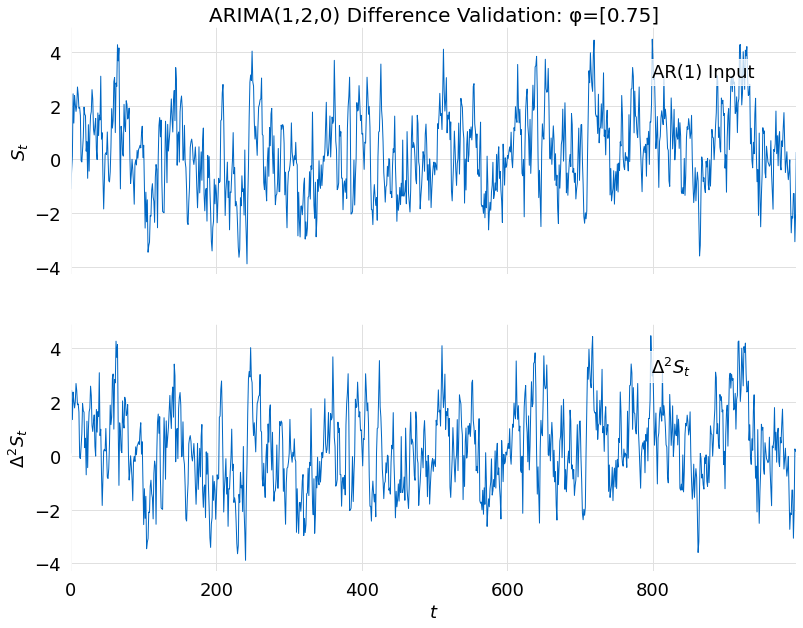

In [14]:
title = f"ARIMA(1,2,0) Difference Validation: φ={φ}"
stack([ar, diff_2], title=title, labels=[r"AR(1) Input", r"$\Delta^2 S_t$"])

In [15]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │   1.36224  │
├────────────────┼────────────┤
│ pvalue         │   0.956171 │
├────────────────┼────────────┤
│ Lags           │   3        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [16]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 16:41:52',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 2, q)-Simulation-7e9bf35a-780f-4270-8b76-4b08dc178c47',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    'TestHypothesis': <TestHypothesis.LOWER_TAIL: 'LOWER_TAIL'>,
    'TestType': <Test.STATIONARITY: 'STATIONARITY'>,
    'ImplType': <_TestImpl.ADF: 'ADF'>,
    'Description': 'Stationarity Test',
    'Distribution': None,
    'Distribution Params': {},
    'TestData': [{'Status': True,
      'Statistic': {'Value': 1.3622408197136708, 'Label': '$t$'},
      'PValue': {'Value': 0.956170

In [17]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │   1.62288  │
├────────────────┼────────────┤
│ pvalue         │   0.974709 │
├────────────────┼────────────┤
│ Lags           │   2        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [18]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-7e9bf35a-780f-4270-8b76-4b08dc178c47',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 16:41:52',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'DIFF-3279864c-dc4f-412f-94ae-1704ff525c2b',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    '

In [19]:
result = Test.STATIONARITY.perform(diff_2)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │ -10.0494      │
├────────────────┼───────────────┤
│ pvalue         │   7.77602e-18 │
├────────────────┼───────────────┤
│ Lags           │   1           │
├────────────────┼───────────────┤
│ Number Obs     │ 996           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [20]:
diff_2.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-7e9bf35a-780f-4270-8b76-4b08dc178c47',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 16:41:52',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'DIFF-7b8dc17c-786a-48ff-b171-de8038fed13e',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 998,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 2},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{2} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,
    'T

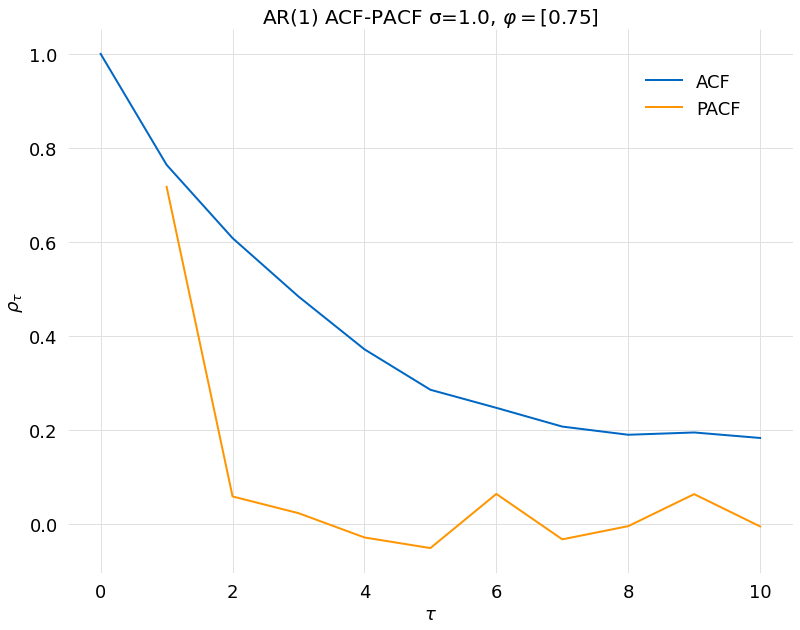

In [21]:
acf = Stats.Func.ACF.apply(diff_2, nlags=nlags)
pacf = ARIMA.Func.PACF.apply(diff_2, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [22]:
result = Est.AR.perform(diff_2, order=1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  998
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1408.835
Date:                Sat, 18 Jun 2022   AIC                           2823.671
Time:                        16:41:53   BIC                           2838.388
Sample:                             0   HQIC                          2829.265
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2744      0.133      2.065      0.039       0.014       0.535
ar.L1          0.7633      0.021     36.816      0.000       0.723       0.804
sigma2         0.9847      0.047     20.859      0.000       0.892       1.077
===================================================================================
Ljung-Box (L1) (Q):                   1.93   Jarque-Bera (JB):                 2.84
Prob(Q):                              0.16   Prob(JB):                         0.24
Heteroskedasticity (H):               0.91   Skew:                            -0.04
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(2,2,0)$ Example

In [23]:
φ = [0.25, 0.4]
d = 2
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Stats.Func.DIFF.apply(arima, ndiff=1)
diff_2 = Stats.Func.DIFF.apply(arima, ndiff=2)

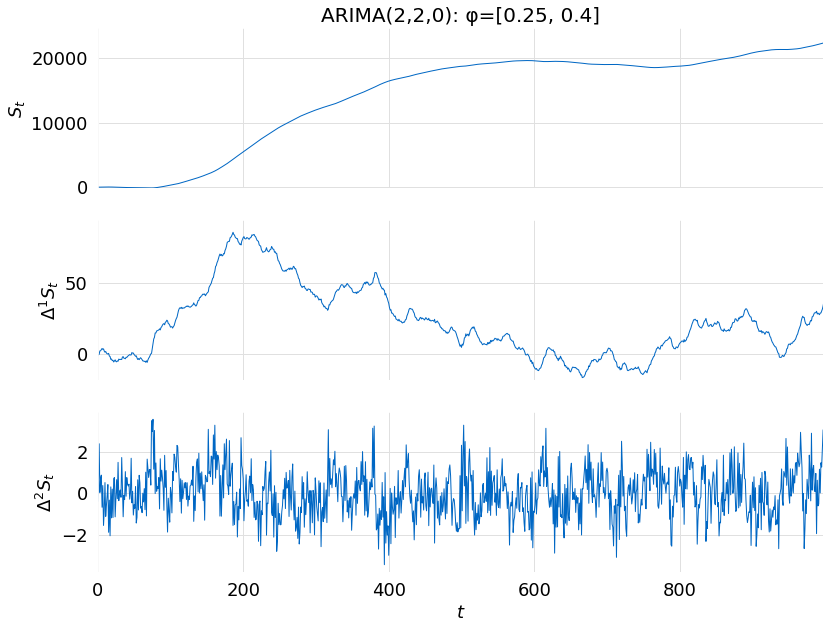

In [24]:
title = f"ARIMA(2,2,0): φ={φ}"
stack([arima, diff_1, diff_2], title=title)

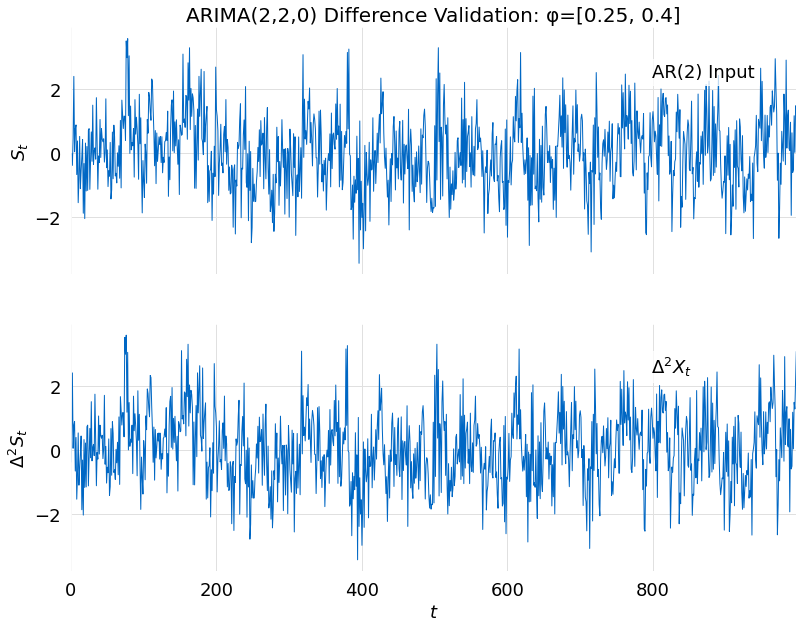

In [25]:
title = f"ARIMA(2,2,0) Difference Validation: φ={φ}"
stack([ar, diff_2], title=title, labels=[r"AR(2) Input", r"$\Delta^2 X_t$"])

In [26]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │   0.347478 │
├────────────────┼────────────┤
│ pvalue         │   0.787485 │
├────────────────┼────────────┤
│ Lags           │   4        │
├────────────────┼────────────┤
│ Number Obs     │ 995        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [27]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 16:41:53',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 2, q)-Simulation-79912966-801b-4c52-844f-fa08c4450e5e',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    'TestHypothesis': <TestHypothesis.LOWER_TAIL: 'LOWER_TAIL'>,
    'TestType': <Test.STATIONARITY: 'STATIONARITY'>,
    'ImplType': <_TestImpl.ADF: 'ADF'>,
    'Description': 'Stationarity Test',
    'Distribution': None,
    'Distribution Params': {},
    'TestData': [{'Status': True,
      'Statistic': {'Value': 0.3474779353653848, 'Label': '$t$'},
      'PValue': {'Value': 0.787485

In [28]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │  -0.85896  │
├────────────────┼────────────┤
│ pvalue         │   0.345863 │
├────────────────┼────────────┤
│ Lags           │   3        │
├────────────────┼────────────┤
│ Number Obs     │ 995        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [29]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-79912966-801b-4c52-844f-fa08c4450e5e',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 16:41:53',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'DIFF-9c8dfa04-9834-420d-b0b4-d1ad5da7cff6',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    '

In [30]:
result = Test.STATIONARITY.perform(diff_2)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │ -10.5463      │
├────────────────┼───────────────┤
│ pvalue         │   6.51591e-19 │
├────────────────┼───────────────┤
│ Lags           │   2           │
├────────────────┼───────────────┤
│ Number Obs     │ 995           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [31]:
diff_2.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-79912966-801b-4c52-844f-fa08c4450e5e',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 16:41:53',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'DIFF-1203f6e5-e7df-431f-bb73-0803ea549653',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 998,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 2},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{2} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,
    'T

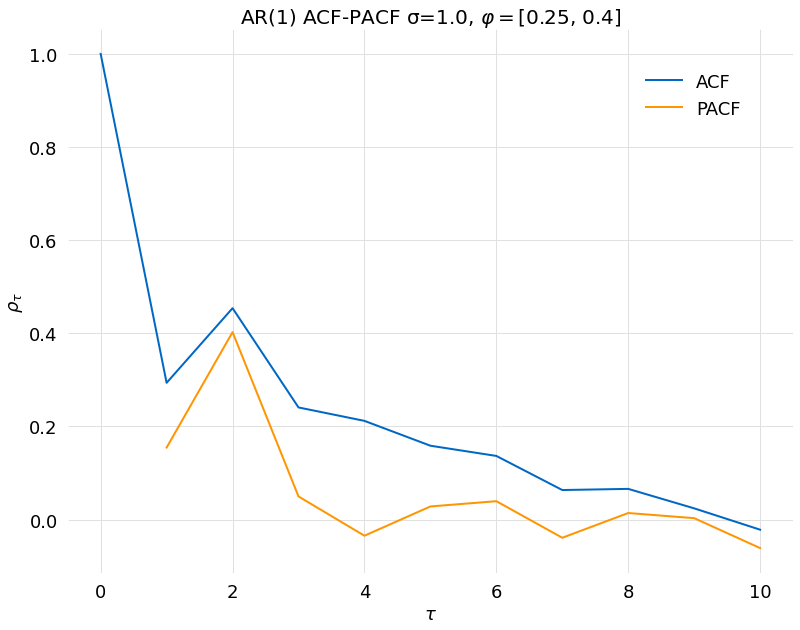

In [32]:
acf = Stats.Func.ACF.apply(diff_2, nlags=nlags)
pacf = ARIMA.Func.PACF.apply(diff_2, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [33]:
result = Est.AR.perform(diff_2, order=2)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  998
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1427.036
Date:                Sat, 18 Jun 2022   AIC                           2862.072
Time:                        16:41:54   BIC                           2881.695
Sample:                             0   HQIC                          2869.531
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0432      0.077      0.562      0.574      -0.108       0.194
ar.L1          0.1771      0.030      5.926      0.000       0.119       0.236
ar.L2          0.4062      0.029     13.839      0.000       0.349       0.464
sigma2         1.0217      0.046     22.288      0.000       0.932       1.112
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.46   Prob(JB):                         0.89
Heteroskedasticity (H):               1.04   Skew:                             0.04
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""